# AI Smoke Detector 

## Introduction
A smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, typically shaped like a disk about 150 millimetres (6 in) in diameter and 25 millimetres (1 in) thick, but shape and size vary.

## Data Exploration
1. UTC - The time when experiment was performed.
2. Temperature - Temperature of Surroundings. Measured in Celsius
3. Humidity - The air humidity during the experiment.
4. TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)
5. eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)
6. Raw H2 - The amount of Raw Hydrogen present in the surroundings.
7. Raw Ethanol - The amount of Raw Ethanol present in the surroundings.
8. Pressure - Air pressure. Measured in hPa
9. PM1.0 - Paticulate matter of diameter less than 1.0 micrometer .
10. PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.
11. NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.
12. NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.
13. NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.
14. CNT - Simple Count.
15. Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.

In [1]:
# necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_context('talk')
sns.set_style('whitegrid')

## Data & Pre-Processing 

In [2]:
df= pd.read_csv('/Users/ASUS/Downloads/smoke_detection_iot.csv',index_col='Unnamed: 0')
print('Shape- ',df.shape)
print('\n')
print('Datatypes- ','\n', df.dtypes.value_counts())
df.sample(5)

Shape-  (62630, 15)


Datatypes-  
 float64    8
int64      7
dtype: int64


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
27167,1654763516,17.19,54.08,0,400,13183,20107,939.611,0.89,0.92,6.12,0.954,0.022,2173,0
46981,1654783330,26.98,47.67,1343,400,12964,19389,938.734,1.94,2.02,13.36,2.083,0.047,21987,1
16947,1654750278,14.08,47.32,1136,401,12896,19444,938.769,1.52,1.57,10.43,1.626,0.037,16947,1
35783,1654772132,24.58,49.69,1053,702,12782,19461,939.072,2.07,2.15,14.23,2.219,0.050,10789,1
52532,1654713577,26.09,46.98,92,400,12783,20632,937.421,1.75,1.82,12.07,1.883,0.043,1390,0


### Checking if there null values in data 

In [3]:
df.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

### Duplicated Rows 

In [4]:
df.duplicated().sum()

0

Data has few columns which are not one of deciding factors for example UTC and Count. Now, UTC is just a time period during which this test was conducted and Count is simply a count and same like an index. Hence, we will drop these two columns.

In [5]:
df.drop(['UTC','CNT'], axis=1, inplace=True)

## EDA

In [6]:
df.groupby('Fire Alarm').mean()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Fire Alarm,,,,,,,,,,,,
0,19.694803,42.930077,4596.587255,962.587255,12896.316847,20082.823533,938.101383,261.982706,450.034639,1356.283816,493.872027,178.982259
1,14.483152,50.779534,882.013071,553.189356,12960.878053,19623.050428,938.837806,36.146406,78.417842,146.111337,87.665549,40.541627


In [7]:
df.groupby('Fire Alarm').median()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Fire Alarm,,,,,,,,,,,,
0,20.54,46.14,86.0,400.0,12837.0,20158.0,937.478,1.45,1.52,9.97,1.578,0.039
1,20.02,51.40,1103.0,404.0,12933.0,19454.0,938.878,1.87,1.94,12.86,2.005,0.045


The median temperature of both fire alarm and No fire alarm are nearby which means temperature does not has a significant role to play. Also there is a difference in mean and median of Temperature which means there are plenty of outliers.

### Temperature 

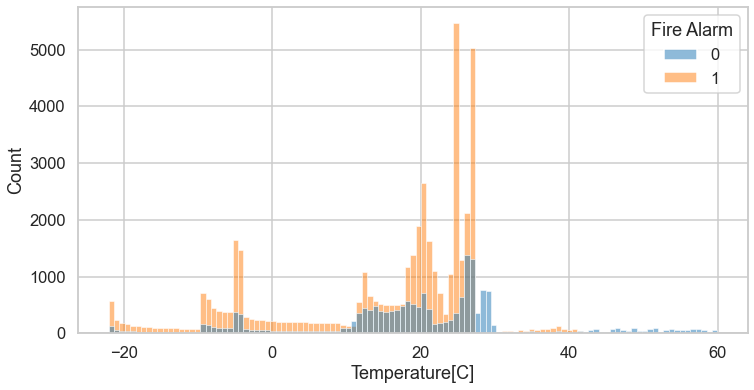

In [8]:
plt.figure(figsize=(12,6))
ax= sns.histplot(x= df['Temperature[C]'],data= df, hue='Fire Alarm');

### Humidity

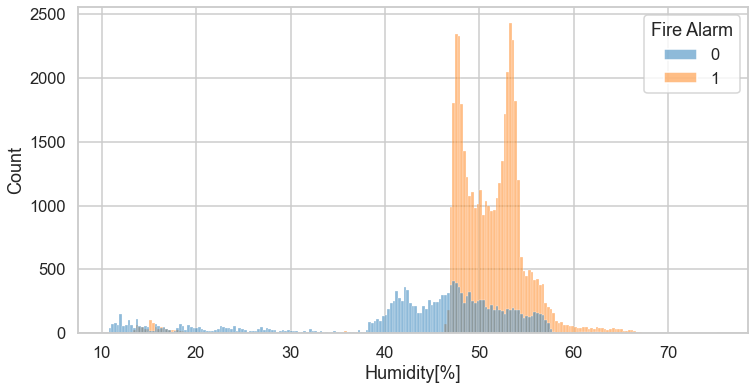

In [9]:
plt.figure(figsize=(12,6))
ax= sns.histplot(x= 'Humidity[%]',data= df, hue='Fire Alarm');

In [10]:
feat= ['TVOC[ppb]','eCO2[ppm]','Raw H2','Raw Ethanol','Pressure[hPa]','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']

In [11]:
ap= ['PM1.0','PM2.5','NC0.5','NC1.0','NC2.5']

### Other features in the dataset 

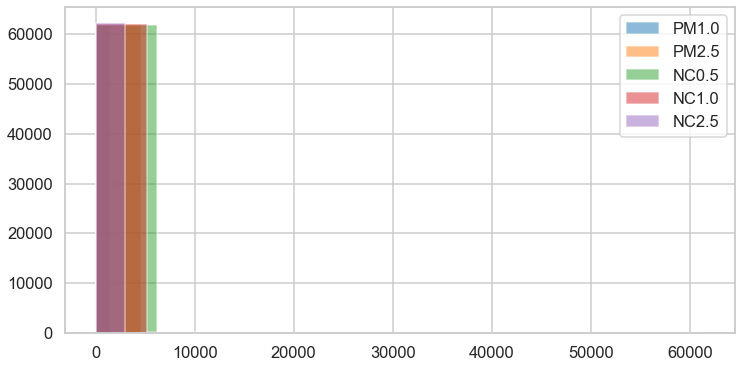

In [12]:
plt.figure(figsize=(12,6))
for col in ap:
   df[col].hist(alpha=0.5)
   plt.legend(ap)

## Correlation 

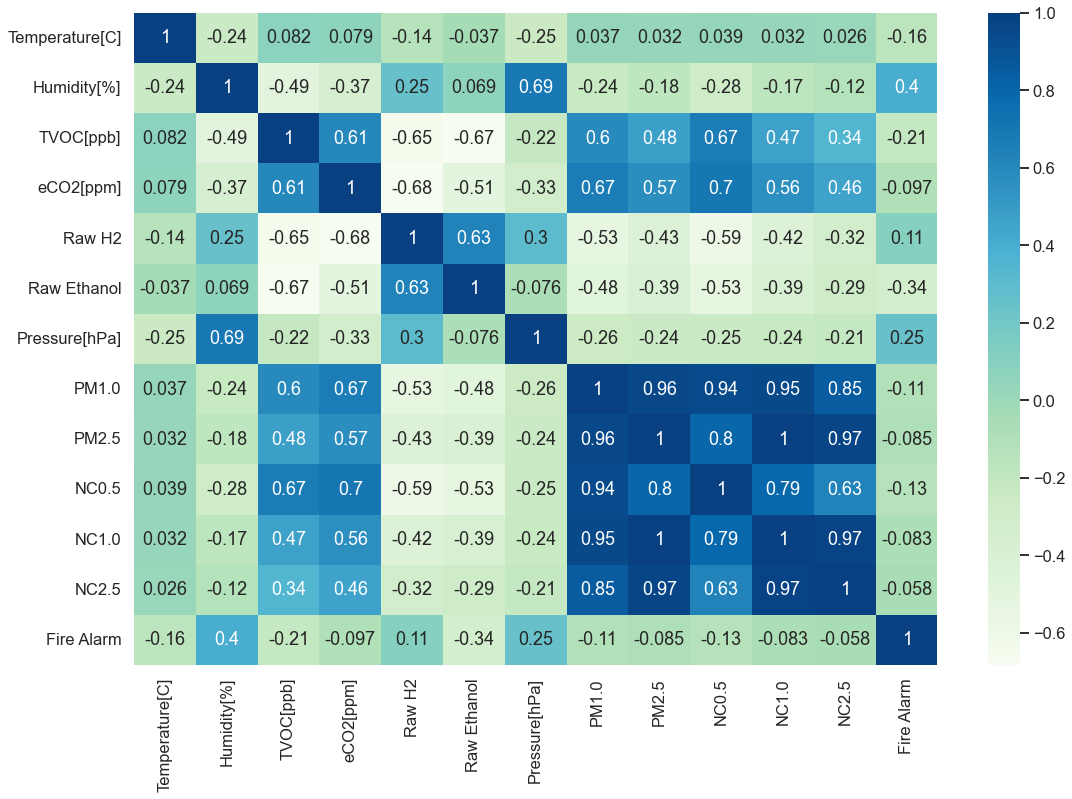

In [13]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, cmap = 'GnBu');

## Data Split between Training and Testing Sets

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
sss= StratifiedShuffleSplit(n_splits=1,random_state=42)
x= df.drop('Fire Alarm', axis=1)
y= df['Fire Alarm']

In [16]:
train_idx, test_idx= next(sss.split(x, y))
x_train, x_test= x.loc[train_idx], x.loc[test_idx]
y_train, y_test= y.loc[train_idx], y.loc[test_idx]

In [17]:
print('Original Classification Percentage- ','\n',y.value_counts(normalize=True))
print('\n')
print('Training Set Classification Percentage','\n',y_train.value_counts(normalize=True))
print('\n')
print('Testing Set Classification Percentage','\n',y_test.value_counts(normalize= True))

Original Classification Percentage-  
 1    0.714626
0    0.285374
Name: Fire Alarm, dtype: float64


Training Set Classification Percentage 
 1    0.71462
0    0.28538
Name: Fire Alarm, dtype: float64


Testing Set Classification Percentage 
 1    0.714673
0    0.285327
Name: Fire Alarm, dtype: float64


## Scaling 

In [18]:
scl= StandardScaler()

In [19]:
x_train_scl= pd.DataFrame(scl.fit_transform(x_train),columns= x_train.columns)
x_test_scl= pd.DataFrame(scl.transform(x_test), columns= x_test.columns)

## Model Development 

In [20]:
## models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [21]:
## metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [22]:
model= [LogisticRegression(),
       KNeighborsClassifier(),
       DecisionTreeClassifier(),
       RandomForestClassifier(),
       GradientBoostingClassifier(),
       SVC()]

In [23]:
%%time
name= []
train=[]
test=[]

for mod in model:
    name.append(type(mod).__name__)
    mod.fit(x_train_scl, y_train)
    prediction_tr= mod.predict(x_train_scl)
    prediction_ts= mod.predict(x_test_scl)
    
    train.append(pd.Series({'Accuracy':accuracy_score(y_train, prediction_tr),
                            'Precision':precision_score(y_train, prediction_tr),
                            'Recall':recall_score(y_train, prediction_tr),
                            'F1 Score':f1_score(y_train, prediction_tr)},name='Train'))
                            
                               
    test.append(pd.Series({'Accuracy':accuracy_score(y_test, prediction_ts),
                           'Precision':precision_score(y_test, prediction_ts),
                            'Recall':recall_score(y_test, prediction_ts),
                           'F1 Score':f1_score(y_test, prediction_ts)},name='Test'))
   

CPU times: total: 3min 8s
Wall time: 3min 12s


In [24]:
train_res= pd.DataFrame(train, index= name)
test_res= pd.DataFrame(test, index= name)

## Training Results 

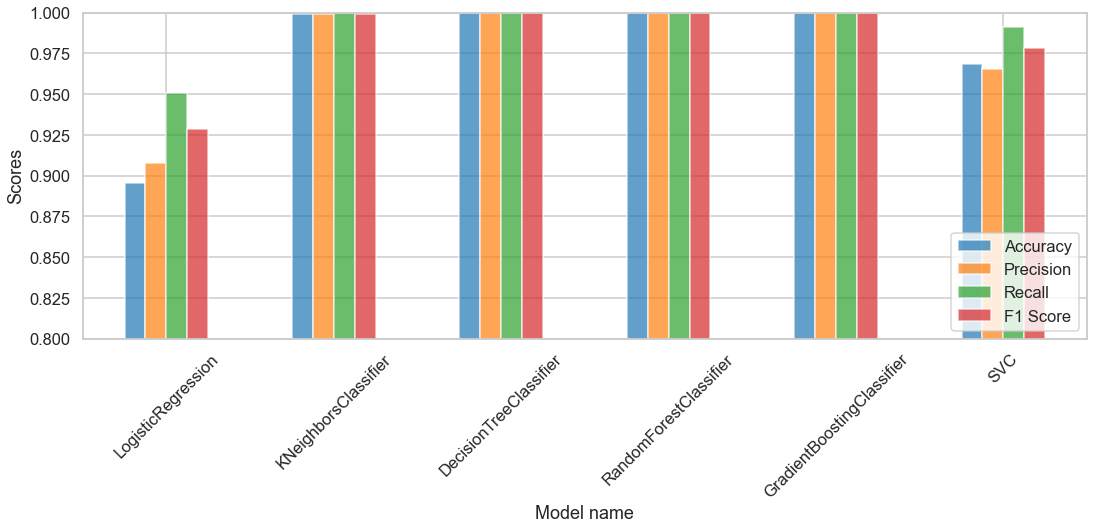

In [25]:
ax= train_res.plot(kind='bar',figsize=(18,6), alpha= 0.7)
ax.set(xlabel='Model name',ylabel='Scores',ylim=[0.8,1.0])
plt.xticks(rotation= 45)
plt.legend(loc= 'lower right');

## Testing set Results 

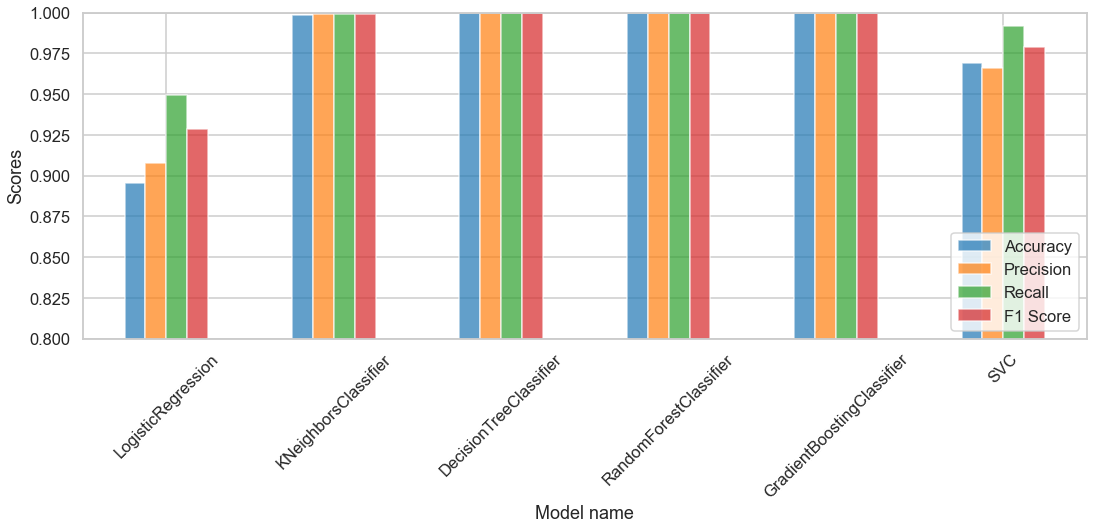

In [26]:
ax= test_res.plot(kind='bar',figsize=(18,6), alpha=0.7)
ax.set(xlabel='Model name',ylabel='Scores',ylim=[0.8,1.0])
plt.xticks(rotation= 45)
plt.legend(loc='lower right');

Looking at both Training and Testng result, what we can take away is that
* Trees and Ensemble models are performing better than the rest, hence we can continue model deployment with either Decision Tree, Random Forest or Gradient Boosting. All of these three models are giving us accurate Accuracy, Precision and Recall scores.

* The other thing to notice is that, Outcomes of both Training and Hold out set are very close or equivalent to each other, which means models are generalizing well hence avoiding overfitting. 